In [55]:
# import libs
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the config of the plotsa we will create






In [56]:
#read in the data
df = pd.read_csv('movies.csv')

In [57]:
# Roughly look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Data Cleansing

In [58]:
# Check Missing Data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [59]:
# Data types for our colums

df.dtypes

name object
rating object
genre object
year int64
released object
score float64
votes float64
director object
writer object
star object
country object
budget float64
gross float64
company object
runtime float64
dtype: object

In [60]:
df['budget'] = df['budget'].astype(int)
#can't change due to NaN Value

IntCastingNaNError: IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [23]:
# Lots of null = let's drop it for the easiest way
df.isnull

<bound method DataFrame.isnull of                                                 name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

     

In [24]:
# drop all Null =
df = df.dropna()

In [25]:
df.isnull

<bound method DataFrame.isnull of                                                 name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                   

In [26]:
# Change float to int
df = df.astype({'budget' : int, 'gross' : int})

In [33]:
# No float now
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [41]:
# correct what I do worng [don't forget to return to df]
df = df.drop(columns=["yearreleased"])

In [39]:
# columns 'year' has doesn't match the year in 'release', it needs to fix
# extract year #pat = pattern 
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [42]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [44]:
# order by gross
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [45]:
# look all data without...
pd.set_option('display.max_rows', None)

In [135]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [124]:
#Drop any duplicates (if any)
df.drop_duplicates()
#5421 rows x 17 columns to 5421 rows x 17 columns : it seems there is no dup
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [132]:
# Checking Another round
df.duplicated().value_counts().sum
# No True Boloon = No Dup

<bound method NDFrame._add_numeric_operations.<locals>.sum of False    5421
dtype: int64>

# Finding Correlations in the Data

In [ ]:
# Budget high correlation
# Hypothesis : company high budget = high gross rev

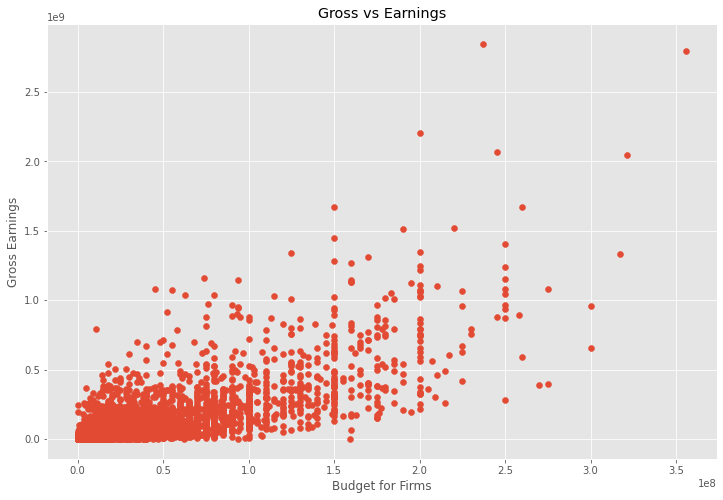

In [8]:
# Scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Gross vs Earnings')
plt.xlabel('Budget for Firms')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

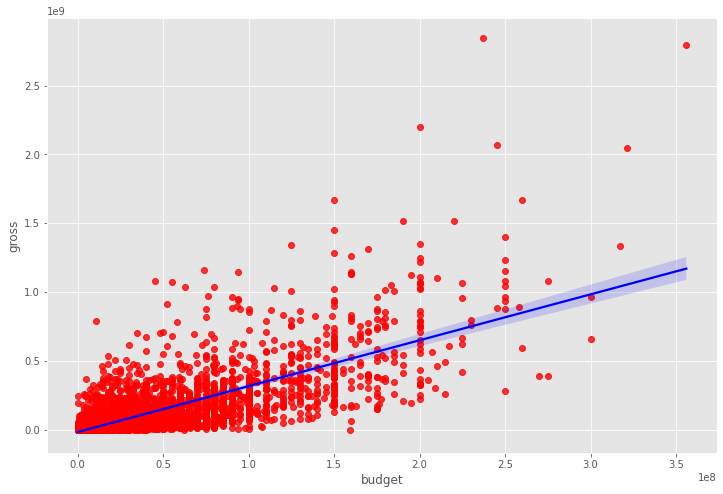

In [10]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={"color" : "blue"})

In [18]:
# the answers show it is corelated...but how much?
df.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


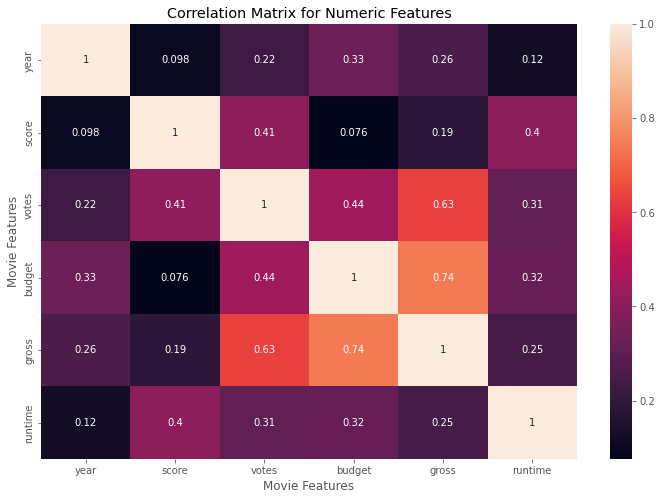

In [24]:
# Correlation between budget and gross
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

# Roughly looking, the factors affecting the gross earnings are the votes and the budget
However, normally, votes come after the on-air, so it is no surprise that the votes are highly correlated with high-gross-earning movies.

To conclude **High Budget = High Gross Earning**

# "Do some genre tend to produce higher revenue than others?"

In [10]:
# add more lib for stats
from scipy.stats import stats

In [19]:
#Due to too much data, let cut half of them
df2 = df.sort_values(by=['gross'], inplace=False, ascending=False)
gross_mean = df2['gross'].mean()

In [28]:
# just Test df3 = df2[df2['gross'] >= gross_mean]

<AxesSubplot:xlabel='gross', ylabel='genre'>

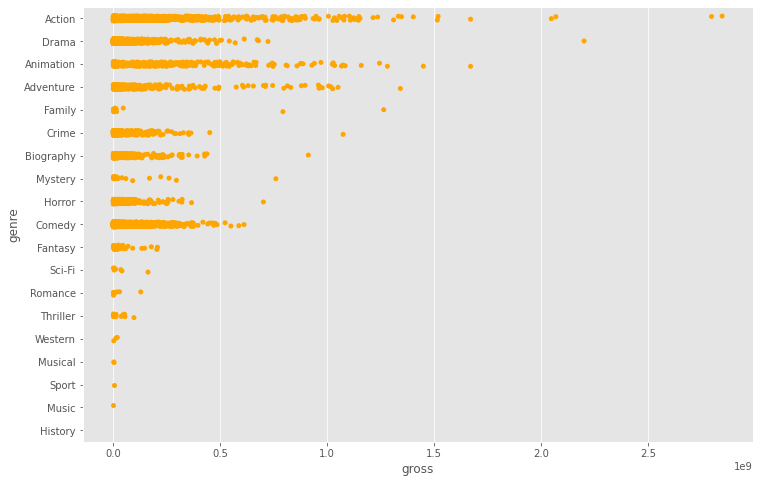

In [43]:
sns.stripplot(x='gross', y='genre', data=df2, color='orange')
# Well, look like Action Genre produces the highest gross earnings

In [52]:
# is it really true? let's find out budget_per_earnings
#df3['budget_per_earnings']

In [51]:
df3 = df3.dropna()
df3

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,48 Hrs.,R,Action,1982,"December 8, 1982 (United States)",6.9,73000.0,Walter Hill,Roger Spottiswoode,Nick Nolte,United States,12000000.0,7.886851e+07,Paramount Pictures,96.0
5038,The Sentinel,PG-13,Action,2006,"April 21, 2006 (United States)",6.1,49000.0,Clark Johnson,George Nolfi,Michael Douglas,United States,60000000.0,7.881060e+07,Twentieth Century Fox,108.0
1261,The Naked Gun: from the Files of Police Squad!,PG-13,Comedy,1988,"December 2, 1988 (United States)",7.6,158000.0,David Zucker,Jerry Zucker,Leslie Nielsen,United States,12000000.0,7.875618e+07,Paramount Pictures,85.0
1881,Teenage Mutant Ninja Turtles II: The Secret of...,PG,Action,1991,"March 22, 1991 (United States)",6.0,53000.0,Michael Pressman,Kevin Eastman,Paige Turco,United States,25000000.0,7.865681e+07,Golden Harvest Company,88.0


In [104]:
df3['gross_per_budget'] = df3['gross'].div(df3['budget'])
df3

#Now we have gross_per_budget(G/B) or ROI(return of invesment)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,gross_per_budget
6237,The Devil Inside,R,Horror,2012,"January 6, 2012 (United States)",4.2,35000.0,William Brent Bell,William Brent Bell,Fernanda Andrade,United States,1000000.0,101758490.0,Insurge Pictures,83.0,101.758490
4456,Saw,R,Horror,2004,"October 29, 2004 (United States)",7.6,391000.0,James Wan,Leigh Whannell,Cary Elwes,United States,1200000.0,103911669.0,Evolution Entertainment,103.0,86.593058
209,E.T. the Extra-Terrestrial,PG,Family,1982,"June 11, 1982 (United States)",7.8,381000.0,Steven Spielberg,Melissa Mathison,Henry Thomas,United States,10500000.0,792910554.0,Universal Pictures,115.0,75.515291
3089,The Full Monty,R,Comedy,1997,"September 19, 1997 (United States)",7.2,101000.0,Peter Cattaneo,Simon Beaufoy,Robert Carlyle,United Kingdom,3500000.0,257938649.0,Redwave Films,91.0,73.696757
4080,My Big Fat Greek Wedding,PG,Comedy,2002,"August 2, 2002 (United States)",6.6,122000.0,Joel Zwick,Nia Vardalos,Nia Vardalos,Canada,5000000.0,368744044.0,Gold Circle Films,95.0,73.748809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4787,Stealth,PG-13,Action,2005,"July 29, 2005 (United States)",5.1,52000.0,Rob Cohen,W.D. Richter,Josh Lucas,United States,135000000.0,79268322.0,Columbia Pictures,121.0,0.587173
5205,Fred Claus,PG,Comedy,2007,"November 9, 2007 (United States)",5.6,41000.0,David Dobkin,Dan Fogelman,Vince Vaughn,United States,100000000.0,97838349.0,Warner Bros.,116.0,0.978383
3942,Ali,R,Biography,2001,"December 25, 2001 (United States)",6.8,95000.0,Michael Mann,Gregory Allen Howard,Will Smith,United States,107000000.0,87812729.0,Columbia Pictures,157.0,0.820680
6312,47 Ronin,PG-13,Action,2013,"December 25, 2013 (United States)",6.3,152000.0,Carl Rinsch,Chris Morgan,Keanu Reeves,United States,175000000.0,151783839.0,Bluegrass Films,128.0,0.867336


In [105]:
#make it int
df3 = df3.astype({'gross_per_budget' : int})

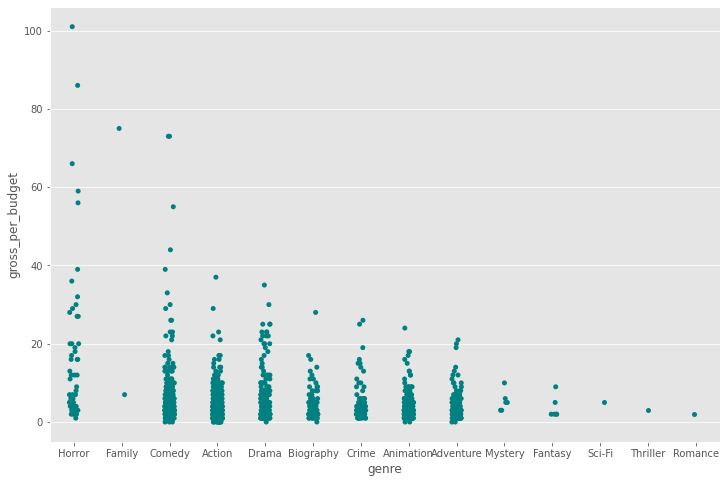

In [106]:
#let's check which genre has the highest G/B
ROI = sns.stripplot(x='genre', y='gross_per_budget', data=df3, color='teal')

# To be concluded by the beginner's views
If you want to get rich by making movies, you should focus on **Horror, Comedy, Action, or Drama**

for Familiy Genre, there are too few dataset, so it is hard to say

In [107]:
df3

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,gross_per_budget
6237,The Devil Inside,R,Horror,2012,"January 6, 2012 (United States)",4.2,35000.0,William Brent Bell,William Brent Bell,Fernanda Andrade,United States,1000000.0,101758490.0,Insurge Pictures,83.0,101
4456,Saw,R,Horror,2004,"October 29, 2004 (United States)",7.6,391000.0,James Wan,Leigh Whannell,Cary Elwes,United States,1200000.0,103911669.0,Evolution Entertainment,103.0,86
209,E.T. the Extra-Terrestrial,PG,Family,1982,"June 11, 1982 (United States)",7.8,381000.0,Steven Spielberg,Melissa Mathison,Henry Thomas,United States,10500000.0,792910554.0,Universal Pictures,115.0,75
3089,The Full Monty,R,Comedy,1997,"September 19, 1997 (United States)",7.2,101000.0,Peter Cattaneo,Simon Beaufoy,Robert Carlyle,United Kingdom,3500000.0,257938649.0,Redwave Films,91.0,73
4080,My Big Fat Greek Wedding,PG,Comedy,2002,"August 2, 2002 (United States)",6.6,122000.0,Joel Zwick,Nia Vardalos,Nia Vardalos,Canada,5000000.0,368744044.0,Gold Circle Films,95.0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4787,Stealth,PG-13,Action,2005,"July 29, 2005 (United States)",5.1,52000.0,Rob Cohen,W.D. Richter,Josh Lucas,United States,135000000.0,79268322.0,Columbia Pictures,121.0,0
5205,Fred Claus,PG,Comedy,2007,"November 9, 2007 (United States)",5.6,41000.0,David Dobkin,Dan Fogelman,Vince Vaughn,United States,100000000.0,97838349.0,Warner Bros.,116.0,0
3942,Ali,R,Biography,2001,"December 25, 2001 (United States)",6.8,95000.0,Michael Mann,Gregory Allen Howard,Will Smith,United States,107000000.0,87812729.0,Columbia Pictures,157.0,0
6312,47 Ronin,PG-13,Action,2013,"December 25, 2013 (United States)",6.3,152000.0,Carl Rinsch,Chris Morgan,Keanu Reeves,United States,175000000.0,151783839.0,Bluegrass Films,128.0,0


In [108]:
df3.describe()['gross_per_budget']

count 1748.000000
mean 5.037757
std 6.977825
min 0.000000
25% 2.000000
50% 3.000000
75% 6.000000
max 101.000000
Name: gross_per_budget, dtype: float64

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gross_per_budget'>

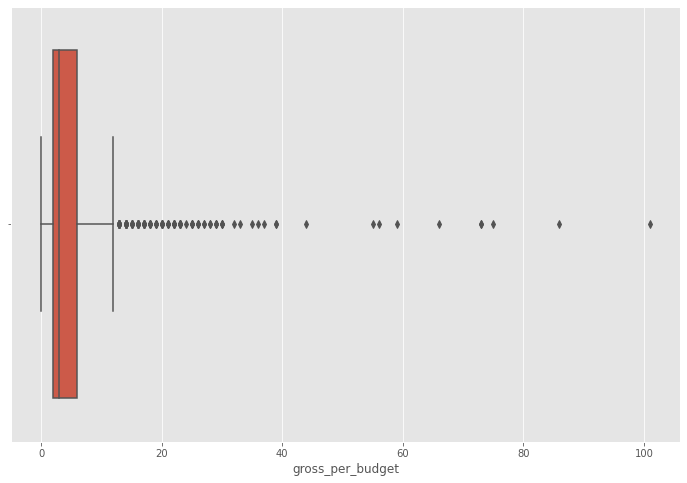

In [109]:
sns.boxplot(df3['gross_per_budget'])

In [113]:
#look like there some outliner statistically. But in the real world, it isn't imposible to make a move that make that much
df4 = df3[['genre','gross_per_budget']]
df4

,genre,gross_per_budget
6237,Horror,101
4456,Horror,86
209,Family,75
3089,Comedy,73
4080,Comedy,73
...,...,...
4787,Action,0
5205,Comedy,0
3942,Biography,0
6312,Action,0
